In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt 

We cut quasars at z=2 : otherwise our quasar sample would go into the stellar locus

In [24]:
# Load the cross-matched HLC-NSC catalog
hlc_nsc = Table(np.load('hlc_nsc_half_arcsec.npy'))

# Load the QSO training sample
qso = Table(np.load('hlc_nsc_sdss_qso_matches.npy'))

# Load the standard stars training sample 
stars = Table(np.load('hlc_nsc_sdss_stars_matches.npy'))

Bovy+2011 :  http://iopscience.iop.org/article/10.1088/0004-637X/729/2/141/pdf ( a good illustration of how QSO really move out of the u-g<0.5 locus beyond z=2 ) 
<img src='bovy2011_fig7.png' width=500>

Fan+1999 : http://iopscience.iop.org/article/10.1086/300848/pdf ( shows the redshift color evolution of quasars) 
<img src='fan1999_fig12.png'>

A version of Ivezic+2004 from the report of Suberlak+2017  on re-processed S82 data
<img src='suberlak2017_fig11.png' width=500>. It shows  the same color-color space as Fig.9.18 from AstroML <img src='fig9-18_astroml.png' width=600> (http://www.astroml.org/book_figures/chapter9/fig_star_quasar_ROC.html)

Deredden the HLC-NSC magnitudes ( We need to brighten the apparent magnitude by the amount of reddening to correct for the extinction  - see eg. http://www.astro.ncu.edu.tw/~wchen/Courses/ISM/ ) 



In [7]:
from astropy.table import hstack

In [25]:
def add_reddening(cat):
    # Cast onto Table 
    reddening = Table(cat['HLC_REDDENING'], 
                      names=([f+'REDHLC' for f in 'ugriz' ]))
    # Remove old column
    cat.remove_column('HLC_REDDENING')
    # Add new columns 
    cat = hstack([reddening, cat])

    return cat


# Do that for HLC-NSC,  QSO and STARS 
hlc_nsc = add_reddening(hlc_nsc)
qso = add_reddening(qso)
stars = add_reddening(stars)

(array([  106.,   412.,   668.,   891.,  1425.,  2818.,  6627.,  8280.,
          795.,     0.]),
 array([ 0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,
         1.04,  1.1 ]),
 <a list of 10 Patch objects>)

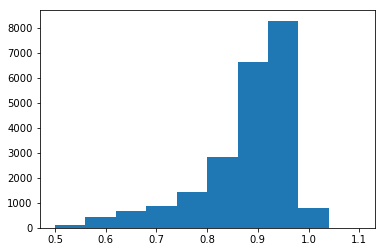

In [31]:
# Just to confirm - since these 
# are quasars,  their class_star should be pretty high...
plt.hist(qso['NSCclass_star'], range=(0.5,1.1))

Plot the HLC-NSC all points on u-g,  g-r  diagram,  and overplot the QSO and SDSS,
using HLC colors (since those are definitely dereddened): 




/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


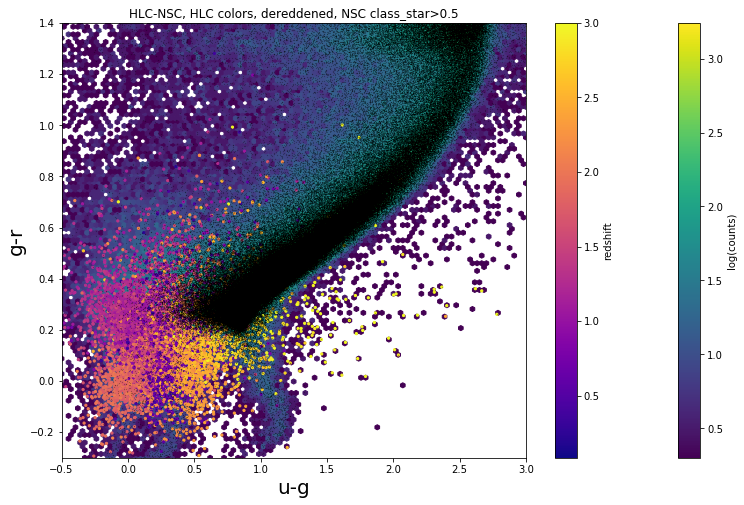

In [79]:
%matplotlib inline

# Select HLC-NSC data : 
# -->  point sources 
m_star = hlc_nsc['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = hlc_nsc['HLCgmag'] /hlc_nsc['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = hlc_nsc['HLCumag'][m]  - hlc_nsc['uREDHLC'][m]
g = hlc_nsc['HLCgmag'][m]  - hlc_nsc['gREDHLC'][m]
r  = hlc_nsc['HLCrmag'][m]  - hlc_nsc['rREDHLC'][m]


col0 = u-g
col1 = g-r

# 2D-histogram of objects in the g-r vs r-i color diagram 
fig, ax1 = plt.subplots(1, 1, figsize=(13, 8))
im1 = ax1.hexbin(col0, col1, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5,3, -0.3,1.4))
plt.colorbar(im1, label='log(counts)')
# QSO
# -->  point sources 
m_star = qso['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = qso['HLCgmag'] / qso['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = qso['HLCumag'][m]  - qso['uREDHLC'][m]
g = qso['HLCgmag'][m]  - qso['gREDHLC'][m]
r  = qso['HLCrmag'][m]  - qso['rREDHLC'][m]
col0 = u-g
col1 = g-r

d = len(qso['Z'].data[m])
cmap = plt.get_cmap('plasma', d) 
im = ax1.scatter(col0,col1, c=qso['Z'].data[m], cmap=cmap, s=5, vmax=3)
plt.colorbar(im, label='redshift')


# STARS
# -->  point sources 
m_star = stars['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = stars['HLCgmag'] / stars['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = stars['HLCumag'][m]  - stars['uREDHLC'][m]
g = stars['HLCgmag'][m]  - stars['gREDHLC'][m]
r  = stars['HLCrmag'][m]  - stars['rREDHLC'][m]
col0 = u-g
col1 = g-r
ax1.scatter(col0,col1,c='k',s=0.01, label='stars')
#plt.legend()

ax1.set_xlim(-0.5,3)
ax1.set_ylim(-0.3,1.4)
#ax1.axis([-0.2, 2.0, 23.5, 14])
ax1.set_xlabel('u-g',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)
ax1.set_title('HLC-NSC, HLC colors, dereddened, NSC class_star>0.5')
plt.savefig('hlc_nsc_qso_stars.png', bbox_inches='tight')

Above quasars are colored by their redshift. The black points are SDSS standard stars.  The background are all HLC-NSC sources. This tells us that indeed it should be possible to separate stars and QSO using u-g vs g-r color information. 